***Clustring.ipynb*** file used for making clusters for the group of emails so that while comparing the emails, first to identify the cluster and then to check the similarity with the emails of that clusters

In [1]:
import os
from collections import Counter
from email.parser import Parser
import math
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import gensim
from gensim.models.doc2vec import TaggedDocument

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
rootdir = r"C:\Users\rohit\Downloads\enron_mail_20150507.tar\enron_mail_20150507\maildir\lay-k"

email_analyse - function to take a input of the file expecting a email init and Prase the file data and append the email subject, body, to, from to the respectively lists

In [5]:
def email_analyse(inputfile, to_email_list,from_email_list,email_body):
    with open(inputfile,"r") as f:
        data=f.read()
    
    email = Parser().parsestr(data)
    if email["to"]:
        

        email_to = email['to']
        email_to = email_to.replace("\n","")
        email_to = email_to.replace("\t","")
        email_from = email['from']
        email_from = email_from.replace("\n","")
        email_from = email_from.replace("\t","")
        email_subject = email['subject']
        email_subject = email_subject.replace("\n","")
        email_subject = email_subject.replace("\t","")
        email_subject = email_subject.replace("Re: ","")
        email_subject = email_subject.replace("RE: ","")
        email_subject = email_subject.replace("Fw: ","")
        email_subject = email_subject.replace("FW: ","")

        # email_to = email_to.split(",")

        # for i in email_to:
        #     to_email_list.append(i)
        subject_list.append(email_subject)
        to_email_list.append(email_to)
        from_email_list.append(email_from)
        email_body.append(email.get_payload())

In [6]:
to_email_list = list()
from_email_list = list()
email_body = list()
subject_list = list()

Iteration of loop for number of file in the rootdirand exicuting the email_analyse function for all the files

In [7]:
for directory, subdirectory,filenames in os.walk(rootdir):
    for filename in  filenames:
        try:
            email_analyse(os.path.join(directory,filename),to_email_list,from_email_list,email_body)
        except:
            print(os.path.join(directory,filename))

PosterStemmer object to stem the tokens

In [8]:
ps = PorterStemmer()

Iteration through the email_body list and tokenizing the each member of the list and removing the stopwords from the tokenized list and to stem the remaining words with the PosterStemmer object and concatinated the final list to a new stemed email_body

In [9]:
for i in email_body:
    filtered_sentence = ""
    words = word_tokenize(i)
    stop_words = set(stopwords.words("english"))
    for w in words:
        if w not in stop_words:
            w= ps.stem(w)
            filtered_sentence = filtered_sentence + " " + w
    email_body[email_body.index(i)] = filtered_sentence


In [10]:
subject_list

["2000 Chairman's Award",
 'Field Study Program',
 'IEA Ministerial/OECD Ministerial',
 'Final Eagle BOD Presentation',
 "Richard's Resume",
 'Cornell',
 'Advertising Campaign - NASCAR',
 'Cornell',
 'EnronOnline Management Report for December 8, 2000',
 "Financial Analysts' Reports for 12.12.00",
 'Panel on Valuation in the New Economy - May 23',
 "Zach's First Christmas with Santa",
 '[Fwd: boat rides on bayou!]',
 'Letter from Roger Vasey',
 'Update for Kenneth L Lay',
 'Dabhol Task Force Weekly Call',
 'VIP-Body Shop Locker Selection-Ken Lay',
 'Absolute LAST Release',
 'Conference Call - Press Release Information',
 "Priority Locker Selection-Men's",
 'World Economic Forum Briefing of the China Business Summit 2000',
 'EnronOnline Executive Summary for December 11, 2000',
 'Succession Plan',
 'Executive Committee Invitation - Holiday Open House 12/19',
 'Succession Plan',
 'Hearty Congratulations!',
 'Fwd: BCCA Fundraising Update 12-12-00',
 '',
 'World Economic Forum Briefing of 

from the processed lists of to,from,subject,body to make a Pandas datafram for futher analysis

In [11]:
import pandas as pd
emails = pd.DataFrame(
    {'To': to_email_list,
     'From': from_email_list,
     'Subject': subject_list,
     'Body': email_body
    })

In [12]:
emails

,To,From,Subject,Body
0,"kenneth.lay@enron.com, jeff.skilling@enron.com",ralph.blakemore@enron.com,2000 Chairman's Award,"gentlemen , thank letter memori nomin 2000 ch..."
1,"samantha.bryce@enron.com, adriana.cortes@enron...",barbara.paige@enron.com,Field Study Program,A descript propos field studi program beal 's...
2,kenneth.lay@enron.com,william.ramsay@iea.org,IEA Ministerial/OECD Ministerial,rosale : thank good news . I come back earli ...
3,shea_dugger@i2.com,rosalee.fleming@enron.com,Final Eagle BOD Presentation,here ! ! have great day ! ! stay warm . shea_...
4,kenneth.lay@enron.com,nancy@newcapitolsolutions.com,Richard's Resume,"dear ken , My son , richard , recent sold int..."
...,...,...,...,...
5596,jwatson@velaw.com,rosalee.fleming@enron.com,v2-term sheet with Rockets.DOC,"ken said `` john , look fine . whi send georg..."
5597,johnp@energycoaliton.org,tori.wells@enron.com,,dictat letter ken lay dear john : I enjoy rec...
5598,gene.humphrey@enron.com,tori.wells@enron.com,Health Status,letter dictat ken lay gene : I appreci updat ...
5599,rob.bradley@enron.com,rosalee.fleming@enron.com,Gathering Place Speaking Invitation,"Hi rob - ken said `` If 'll prepar remark , I..."


In [13]:
emails.drop(emails.query(
    "To == '' | From == '' | Body == ''"
).index, inplace=True)

Creating a TfidfVectorizer Object and fit the data of email body

In [14]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(emails.Body)

creating a PCA object 

In [15]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)

In [16]:
coords

array([[-0.14260942, -0.00706098],
       [-0.16827474, -0.02312874],
       [-0.18190057, -0.04915417],
       ...,
       [-0.1646765 , -0.01459183],
       [-0.18710138, -0.01697878],
       [-0.17665617, -0.0012033 ]])

Creating a dataframe of the coords to apply the elbow method to check the best value of the K for the data

In [17]:
data_frame = pd.DataFrame(coords, columns =['x', 'y'])

In [18]:
data_frame.dropna()

,x,y
0,-0.142609,-0.007061
1,-0.168275,-0.023129
2,-0.181901,-0.049154
3,-0.184479,-0.073172
4,-0.147425,-0.038262
...,...,...
5596,-0.174131,-0.029002
5597,-0.174557,-0.024084
5598,-0.164677,-0.014592
5599,-0.187101,-0.016979


In [19]:

from sklearn.metrics import silhouette_score


by using the silhouette_score function to apply the elbow method and plot the graph of the silhoutte score for the optimized value of K

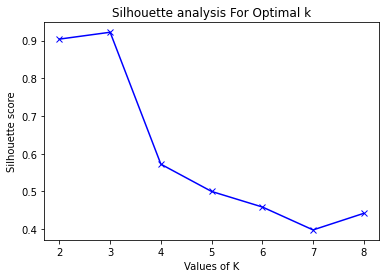

In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_frame)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data_frame, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

as the max value of silhoutte score is at K=3 hence the best value for k is 3

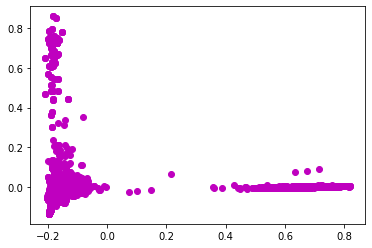

In [21]:
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

function to give the top tfidf features and top features in the documents

In [22]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [23]:
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 1, 10))

   features     score
0      beal  0.455887
1  descript  0.384255
2   barbara  0.350947
3       fyi  0.349110
4     field  0.307642
5     studi  0.298696
6    propos  0.260790
7   project  0.248475
8   program  0.231981
9    attach  0.179006


function to give the top mean features

In [24]:
def top_mean_feats(X, features,
 grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [25]:
print(top_mean_feats(X, features, top_n=10))

     features     score
0     employe  0.062158
1     million  0.050223
2     compani  0.043073
3  california  0.039794
4      consum  0.039169
5      energi  0.038082
6        fund  0.037870
7      declar  0.027137
8  bankruptci  0.027108
9         urg  0.026796


creating the Kmeans classification model.

In [26]:
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

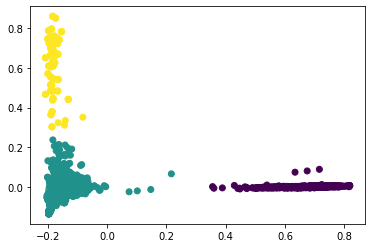

In [27]:
plt.scatter(coords[:, 0], coords[:, 1], c=labels)
plt.show()

function to return the top features per clusters


In [28]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,    min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

function to plot the clusters with the features


In [29]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

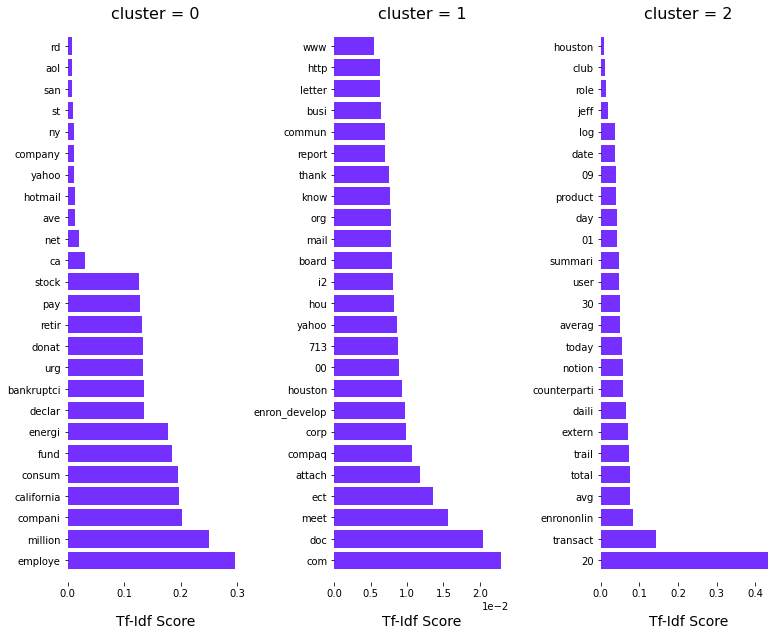

In [30]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

# Similarity

removing the extra unwanted words observed from the clusters graph and creating the model

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(emails.Body)

In [32]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

checking the cosine similarity of by the linear_kernal method

In [33]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(vec_train[0:1], vec_train).flatten()
print(cosine_sim)

[1.         0.         0.02013223 ... 0.01487157 0.03524663 0.03695113]


checking the the most related email for the inputed query

In [34]:
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(emails.Body)

query = "Money"

vec_query = vec.transform([query])

cosine_sim = linear_kernel(vec_query, vec_train).flatten()

In [35]:
related_email_indices = cosine_sim.argsort()[:-10:-1]
print(related_email_indices)

[3494 3177 3381 4084 3447 3386 2803 3063  162]


In [33]:
# Print out the first result
first_email_index = related_email_indices[0]
print(emails.Body[first_email_index])

 ken , I know last coupl week hell I want remind linda friend corner . whatev happen enron , great compani built ground . allot investor ( includ nanci ) made money stock past money given back , . that 's system . the good deed linda , enron rememb longer problem last 3 4 month . good luck -- -jack


Creating a class for orginized use of the above process

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

class EmailDataset: 
  def __init__(self,email_df):
    stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
    self.vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
    self.emails = email_df

    # train on the given email data.
    self.train()
  
  def train(self):
    self.vec_train = self.vec.fit_transform(self.emails)
  
  def query(self, keyword, limit):
    vec_keyword = self.vec.transform([keyword])
    cosine_sim = linear_kernel(vec_keyword, self.vec_train).flatten()
    related_email_indices = cosine_sim.argsort()[:-limit:-1]
    return related_email_indices

  def find_email_by_index(self, i):
    return self.emails.to_numpy()[i]

testing the clusting for an test email as recived email

In [35]:
rec_email=""
rec_email_to=""
rec_email_from=""
rec_email_body=""
rec_email_subject=""

function to analyse the recived email

In [36]:
def rec_email_analyse(email_):
    
    email = Parser().parsestr(email_)
    if email["to"]:
        

        email_to = email['to']
        email_to = email_to.replace("\n","")
        email_to = email_to.replace("\t","")
        email_from = email['from']
        email_from = email_from.replace("\n","")
        email_from = email_from.replace("\t","")
        email_subject = email['subject']
        email_subject = email_subject.replace("\n","")
        email_subject = email_subject.replace("\t","")
        email_subject = email_subject.replace("Re: ","")
        email_subject = email_subject.replace("RE: ","")
        email_subject = email_subject.replace("Fw: ","")
        email_subject = email_subject.replace("FW: ","")
        print(email.get_payload())
        filtered_sentence_rec = ""
        words = word_tokenize(email.get_payload().replace("\n","").replace("\t",""))
        # stop_words = set(stopwords.words("english"))
        for w in words:
            if w not in stop_words:
                w= ps.stem(w)
                filtered_sentence_rec = filtered_sentence_rec + " " + w
        body_ = filtered_sentence_rec

        subject_ = email_subject
        to_ = email_to
        from_ = email_from
        return to_,from_,subject_,email.get_payload().replace("\n","").replace("\t","")

In [37]:
rec_email_file = r"C:\Users\rohit\Downloads\enron_mail_20150507.tar\enron_mail_20150507\maildir\lay-k\all_documents\33_"

In [38]:
with open(rec_email_file,"r") as f:
        rec_email=f.read()

In [39]:
emails_after_rec = emails

In [40]:
rec_email_to,rec_email_from,rec_email_subject,rec_email_body = rec_email_analyse(rec_email)

Mr. Lay,  I have received the proposal from Gulstream and will drop it off 
today.  As you probably already know, the flight from Beijing was a record 
first for the GV into Houston.

I have met and discussed the possibility of the GV replacing a 900B or a 
total fleet transition at length with John Stabler, Ron Fain and Keith 
Jones.  I have prepared a spread sheet showing the affect on budget as well 
as our thoughts and recommendations.
  
Although the cabin size of the Global Express is larger, Gulfstream is a good 
two years ahead of the Global in deliveries and fleet size.  They have 
overcome the mechanical problems that were experienced earlier in the 
program,  problems that  the Global Express may still be facing.  Worldwide 
support and operational experience have the Gulfstream far ahead of the 
Global Express.
  
Bombardier is still looking forward to demonstrating their aircraft to you on 
your India trip in December.

All of us at the department stand ready to do whateve

In [41]:
rec_email_body

'Mr. Lay,  I have received the proposal from Gulstream and will drop it off today.  As you probably already know, the flight from Beijing was a record first for the GV into Houston.I have met and discussed the possibility of the GV replacing a 900B or a total fleet transition at length with John Stabler, Ron Fain and Keith Jones.  I have prepared a spread sheet showing the affect on budget as well as our thoughts and recommendations.  Although the cabin size of the Global Express is larger, Gulfstream is a good two years ahead of the Global in deliveries and fleet size.  They have overcome the mechanical problems that were experienced earlier in the program,  problems that  the Global Express may still be facing.  Worldwide support and operational experience have the Gulfstream far ahead of the Global Express.  Bombardier is still looking forward to demonstrating their aircraft to you on your India trip in December.All of us at the department stand ready to do whatever you feel necessa

In [42]:
emails_after_rec.loc[len(emails_after_rec.index)] = [rec_email_to, rec_email_from, rec_email_subject,rec_email_body]

creating a new object by adding the recived email and in the email_body 

In [159]:
vec_rec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)

In [160]:
vec_train_rec = vec.fit_transform(emails_after_rec.Body)

In [192]:
final_labels = clf.fit_predict(vec_train_rec)

In [211]:
final_labels_list = final_labels.tolist()

In [212]:
final_labels_list

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,


In [216]:
vec_train_rec

<1x23757 sparse matrix of type '<class 'numpy.float64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [213]:
np.insert(vec_train_rec, 1,final_labels_list, axis=1)


AxisError: axis 1 is out of bounds for array of dimension 0

In [198]:
np.append(vec_train_rec, final_labels, axis=1)

ValueError: zero-dimensional arrays cannot be concatenated

In [201]:
vec_train_rec["cluster"] = final_labels

IndexError: Index dimension must be <= 2

In [171]:
cosine_sim_rec = linear_kernel(vec_train_rec[-1], vec_train_rec).flatten()
print(max(cosine_sim_rec))

1.0000000000000004


In [162]:
related_rec_email_indices = cosine_sim_rec.argsort()[:-10:-1]

printing the related email

In [163]:
first_rec_email_index = related_rec_email_indices[0]
print(emails_after_rec.Body[first_rec_email_index])

Gentlemen,

Thank you for the letter memorializing my nomination for the 2000 Chairman's 
Award.  It is a privilege to be a part of the Enron organization.  I have 
received many promotions, cash bonuses and commendations during my career but 
I consider the recognition as a nominee for the 2000 Chairman's Award to be 
the most significant acknowledgment of my performance ever received.  My 
compliments to you for making Enron one of the most successful and excellent 
companies on the globe.  I only wish that I could contribute more to Enron's 
growth and continued success.

Sincerely,

RW Blakemore
Enron Wind Energy Systems Corp.
Center For Advanced Technology 
